In [39]:
from tms_risk.cogmodels.fit_model import build_model, get_data
from tms_risk.cogmodels.utils import plot_prediction, stimulation_order, stimulation_palette
import seaborn as sns
import arviz as az
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from bauer.utils.math import softplus_np
import numpy as np

bids_folder = '/data/ds-tmsrisk'


In [40]:
# Some convenience functions

def get_info(model_label, bids_folder='/data/ds-tmsrisk'):

    df = get_data(model_label=model_label, bids_folder=bids_folder)
    model = build_model(df=df, model_label=model_label)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

    return df, model, idata

def get_curve_posterior(model, evidence_sd_posterior):
    x = np.arange(7, 112)
    dm = model.make_dm(np.arange(7, 112))
    curve_posterior = evidence_sd_posterior.dot(dm.T)
    curve_posterior.columns = x
    curve_posterior.columns.name = 'x'

    return softplus_np(curve_posterior)

def get_curve_stats(model, evidence_sd_posterior):
    curve_posterior = get_curve_posterior(model, evidence_sd_posterior)

    return model.get_sd_curve_stats(curve_posterior.stack().to_frame('sd'))

# Flexible 1

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found n1_evidence_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found n2_evidence_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')


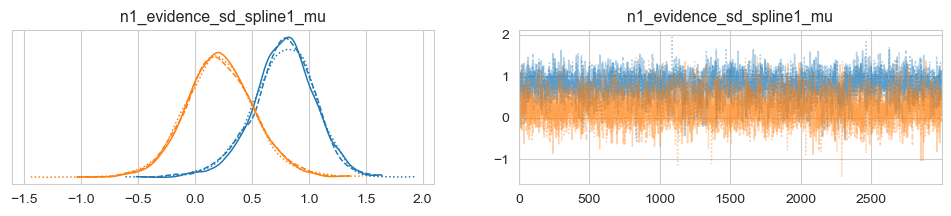

In [126]:
df, model, idata = get_info('flexible1')

az.plot_trace(idata.sel(chain=[0, 1, 3]), var_names=['n1_evidence_sd_spline1_mu'])
idata = idata.sel(chain=[0, 1, 3])

In [127]:
n1_evidence_sd_ips = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n1_evidence_sd_vertex = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

n2_evidence_sd_ips = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n2_evidence_sd_vertex = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1,  6)], axis=1).values

for d in (n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex):
    d.columns = range(1, 6)

evidence_sd = pd.concat((n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex),axis=0,
                        keys=[(1, 'IPS'), (1, 'Vertex'), (2, 'IPS'), (2, 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(model, evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(lambda x: get_curve_stats(model, x))

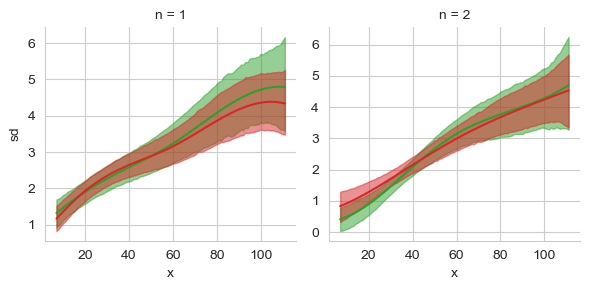

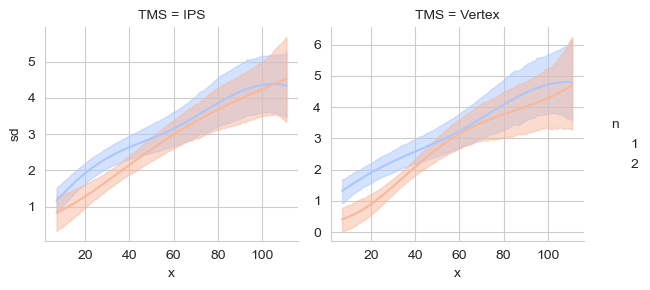

In [128]:
import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=[1, 2], hue_order=stimulation_order, sharey=False)
g.map_dataframe(plot_prediction, x='x', y='sd')

g = sns.FacetGrid(curve_stats.reset_index(), col='TMS', hue='n', palette=sns.color_palette('coolwarm', 2), sharey=False)
g.map_dataframe(plot_prediction, x='x', y='sd')
g.add_legend()

(7.0, 60.0)

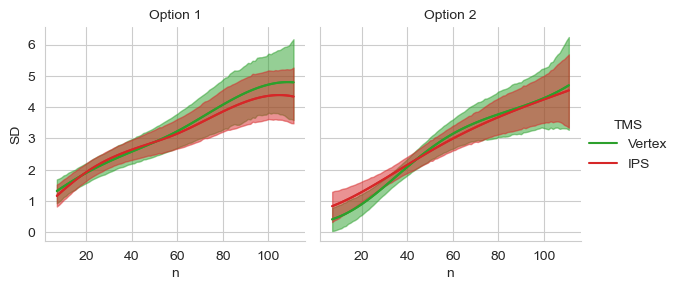

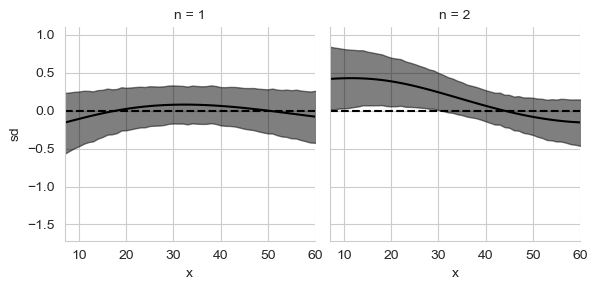

In [129]:
g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_wrap=2, hue_order=stimulation_order)
g.map_dataframe(plot_prediction, x='x', y='sd')
g.map(plt.plot, 'x', 'sd')

g.set_titles('Option {col_name}')
g.set(ylabel='SD', xlabel='n')
g.add_legend()

g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd.pdf'))

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)
# g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd_diff.pdf'))

In [139]:
curve_posterior = curve_posterior.xs(slice(None, None, 25), level='draw', drop_level=False)

tmp = curve_posterior.stack().unstack('n')
tmp_n1 = tmp[1]
tmp_n2 = tmp[2]

evidence_sd = pd.concat((tmp_n1, tmp_n2), axis=0, keys=[1, 2], names=['n'])


evidence_mu = tmp.index.get_level_values('x').to_series()
evidence_mu.index = tmp.index

risky_prior_mu = idata.posterior['risky_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
risky_prior_sd = idata.posterior['risky_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_risky = (evidence_sd + risky_prior_sd)
risky_posterior_mu = evidence_mu * (risky_prior_sd /denom_risky) + risky_prior_mu * (evidence_sd / denom_risky)
risky_posterior_mu.name = 'posterior_mu'

safe_prior_mu = idata.posterior['safe_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
safe_prior_sd = idata.posterior['safe_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_safe = (evidence_sd + safe_prior_sd)
safe_posterior_mu = evidence_mu * (safe_prior_sd /denom_safe) + safe_prior_mu * (evidence_sd / denom_safe)
safe_posterior_mu.name = 'posterior_mu'

posterior_mu = pd.concat((risky_posterior_mu, safe_posterior_mu), axis=0, keys=['risky', 'safe'], names=['choice'])


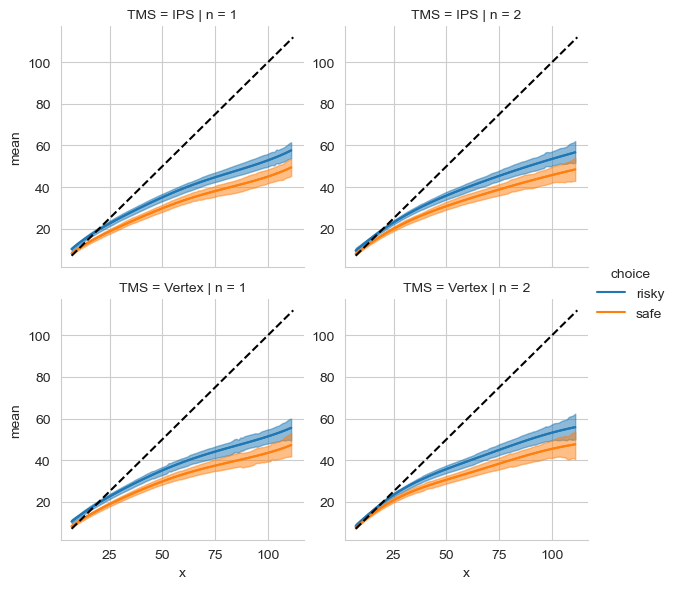

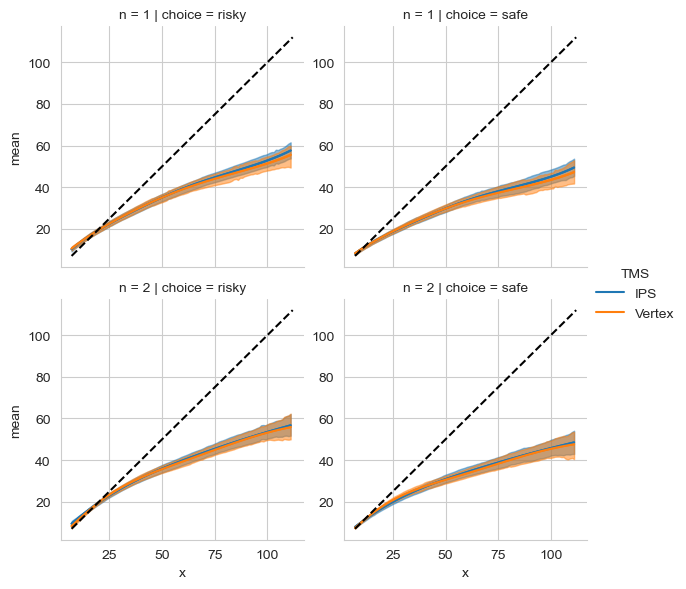

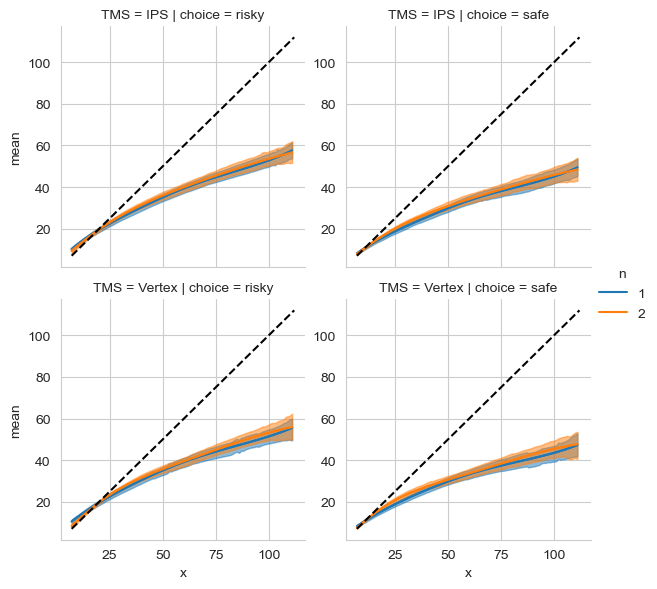

In [140]:
def get_hdi(x):
    return pd.Series(az.hdi(x.values, hdi_prob=0.9), index=['hdi025', 'hdi975'])
mean = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).mean().to_frame('mean')
hdi = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).apply(get_hdi).unstack()

pars = mean.join(hdi)

g = sns.FacetGrid(pars.reset_index(), col='n', sharey=False, hue='choice', row='TMS')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')


g = sns.FacetGrid(pars.reset_index(), col='choice', sharey=False, hue='TMS', row='n')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')

g = sns.FacetGrid(pars.reset_index(), col='choice', sharey=False, hue='n', row='TMS')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')

(-10.0, 10.0)

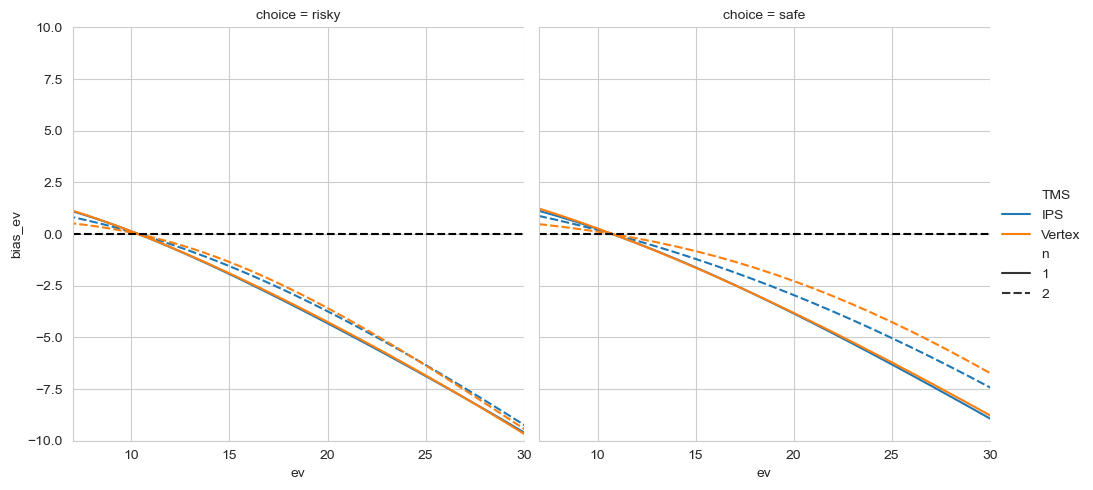

In [141]:
pars = pars.reset_index()
# pars['bias'] = pars['mean'] - pars.index.get_level_values('x')
sns.set_style('whitegrid')



pars['ev'] = pars['x'].where(pars['choice'] == 'safe', pars['x'] * .55)
pars['ev_hat'] = pars['mean'].where(pars['choice'] == 'safe', pars['mean'] * .55)

pars['bias_ev'] = pars['ev_hat'] - pars['ev']


g = sns.relplot(x='ev', y='bias_ev', style='n', hue='TMS', col='choice', data=pars.reset_index(), kind='line')

for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--')

plt.xlim(7, 30)
plt.ylim(-10, 10)


(-10.0, 10.0)

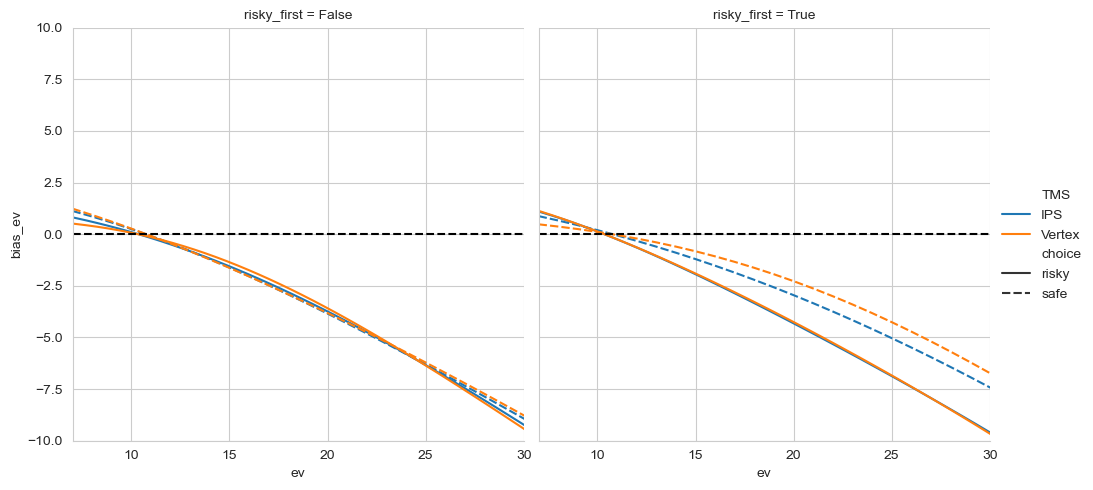

In [142]:
pars['risky_first'] = ((pars['choice'] == 'risky') & (pars['n'] == 1)) | ((pars['choice'] == 'safe') & (pars['n'] == 2))
g = sns.relplot(x='ev', y='bias_ev', style='choice', hue='TMS', col='risky_first', data=pars.reset_index(), kind='line')

for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--')

plt.xlim(7, 30)
plt.ylim(-10, 10)

# Flexible 1B

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found n2_evidence_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')


array([[<Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>,
        <Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>]],
      dtype=object)

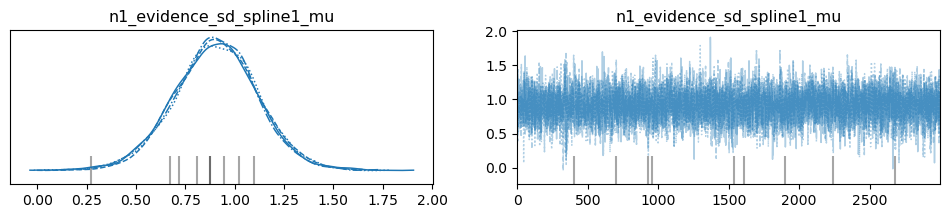

In [45]:
df, model, idata = get_info('flexible1b')

az.plot_trace(idata, var_names=['n1_evidence_sd_spline1_mu'])
# idata = idata.sel(chain=[0, 1, 3])

In [46]:
n1_evidence_sd_ips = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n1_evidence_sd_vertex = n1_evidence_sd_ips

n2_evidence_sd_ips = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n2_evidence_sd_vertex = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1,  6)], axis=1).values

for d in (n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex):
    d.columns = range(1, 6)

evidence_sd = pd.concat((n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex),axis=0,
                        keys=[(1, 'IPS'), (1, 'Vertex'), (2, 'IPS'), (2, 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(model, evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(lambda x: get_curve_stats(model, x))

(7.0, 60.0)

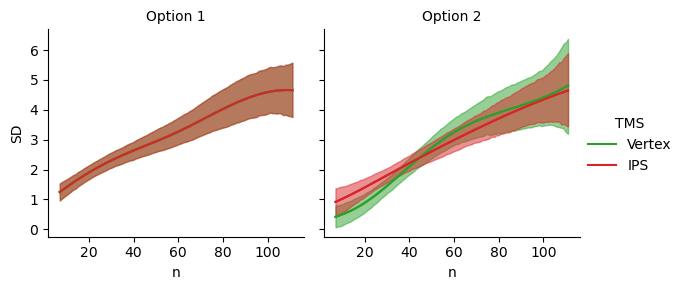

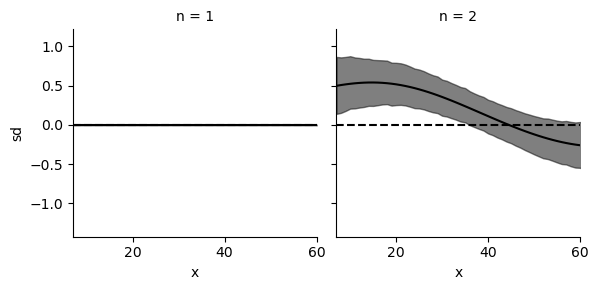

In [47]:
g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_wrap=2, hue_order=stimulation_order)
g.map_dataframe(plot_prediction, x='x', y='sd')
g.map(plt.plot, 'x', 'sd')

g.set_titles('Option {col_name}')
g.set(ylabel='SD', xlabel='n')
g.add_legend()

g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd.pdf'))

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)
# g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd_diff.pdf'))

In [48]:
diff_stats

sd    hdi025    hdi975
x   n                              
7   1  0.000000  0.000000  0.000000
    2  0.497640  0.139880  0.865473
8   1  0.000000  0.000000  0.000000
    2  0.507310  0.152909  0.859742
9   1  0.000000  0.000000  0.000000
...         ...       ...       ...
109 2 -0.134855 -1.169950  0.909364
110 1  0.000000  0.000000  0.000000
    2 -0.150413 -1.305387  0.930419
111 1  0.000000  0.000000  0.000000
    2 -0.167864 -1.301434  1.097199

[210 rows x 3 columns]

In [49]:

diff_stats.query('(n == 2) & (hdi025 > 0)').index.get_level_values('x')

Index([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
      dtype='int64', name='x')

In [ ]:
diff_stats

In [51]:
idata.posterior['n1_evidence_sd_']

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [54]:
curve_posterior.stack().unstack('n')

n                             1         2
TMS    chain draw x                      
IPS    0     0    7    1.295397  1.068570
                  8    1.362731  1.103969
                  9    1.428985  1.139600
                  10   1.493995  1.175438
                  11   1.557620  1.211461
...                         ...       ...
Vertex 3     2975 107  4.061186  3.930858
                  108  4.038833  3.973560
                  109  4.013307  4.018497
                  110  3.984532  4.065754
                  111  3.952433  4.115420

[100800 rows x 2 columns]

In [61]:
curve_posterior

x                         7         8         9         10        11   \
n TMS    chain draw                                                     
1 IPS    0     0     1.295397  1.362731  1.428985  1.493995  1.557620   
               25    1.077599  1.144543  1.211572  1.278469  1.345036   
               50    1.108374  1.172755  1.236595  1.299704  1.361918   
               75    1.232818  1.275090  1.317407  1.359727  1.402014   
               100   1.305528  1.362602  1.418795  1.474014  1.528179   
...                       ...       ...       ...       ...       ...   
2 Vertex 3     2875  0.229220  0.254176  0.281211  0.310396  0.341794   
               2900  0.266109  0.291319  0.318672  0.348279  0.380248   
               2925  0.487789  0.508797  0.531139  0.554856  0.579986   
               2950  0.060083  0.073084  0.088433  0.106434  0.127397   
               2975  0.207064  0.231506  0.258129  0.287014  0.318225   

x                         12        13        14        15        16   ...  \
n TMS    chain draw                                                    ...   
1 IPS    0     0     1.619745  1.680276  1.739140  1.796283  1.851664  ...   
               25    1.411097  1.476492  1.541080  1.604739  1.667361  ...   
               50    1.423097  1.483124  1.541903  1.599358  1.655431  ...   
               75    1.444233  1.486351  1.528338  1.570166  1.611808  ...   
               100   1.581227  1.633105  1.683775  1.733208  1.781385  ...   
...                       ...       ...       ...       ...       ...  ...   
2 Vertex 3     2875  0.375452  0.411405  0.449669  0.490243  0.533112  ...   
               2900  0.414677  0.451652  0.491248  0.533521  0.578514  ...   
               2925  0.606567  0.634630  0.664207  0.695320  0.727991  ...   
               2950  0.151633  0.179442  0.211101  0.246854  0.286901  ...   
               2975  0.351812  0.387803  0.426209  0.467020  0.510201  ...   

x                         102       103       104       105       106  \
n TMS    chain draw                                                     
1 IPS    0     0     4.341106  4.334614  4.325150  4.312620  4.296931   
               25    4.331950  4.364873  4.398325  4.432320  4.466869   
               50    4.955499  4.941541  4.923084  4.899988  4.872117   
               75    4.212185  4.237921  4.263757  4.289701  4.315761   
               100   4.514951  4.510723  4.503441  4.493010  4.479337   
...                       ...       ...       ...       ...       ...   
2 Vertex 3     2875  3.952917  3.946206  3.938382  3.929453  3.919426   
               2900  5.304958  5.353890  5.404653  5.457338  5.512038   
               2925  3.575874  3.574620  3.573216  3.571701  3.570115   
               2950  4.072046  4.091721  4.112533  4.134557  4.157868   
               2975  3.747835  3.780662  3.815291  3.851810  3.890303   

x                         107       108       109       110       111  
n TMS    chain draw                                                    
1 IPS    0     0     4.277990  4.255704  4.229983  4.200734  4.167870  
               25    4.501985  4.537679  4.573965  4.610854  4.648359  
               50    4.839335  4.801505  4.758494  4.710169  4.656397  
               75    4.341944  4.368257  4.394707  4.421302  4.448050  
               100   4.462327  4.441888  4.417928  4.390355  4.359079  
...                       ...       ...       ...       ...       ...  
2 Vertex 3     2875  3.908310  3.896112  3.882840  3.868503  3.853108  
               2900  5.568843  5.627846  5.689140  5.752814  5.818963  
               2925  3.568496  3.566886  3.565322  3.563846  3.562495  
               2950  4.182541  4.208652  4.236276  4.265489  4.296366  
               2975  3.930858  3.973560  4.018497  4.065754  4.115420  

[1920 rows x 105 columns]

In [119]:
(risky_prior_sd / denom_risky)

chain  draw  n  TMS     x  
0      0     1  IPS     7      0.706811
                        8      0.696201
                        9      0.686068
                        10     0.676408
                        11     0.667213
                                 ...   
3      2975  2  Vertex  107    0.432680
                        108    0.430030
                        109    0.427276
                        110    0.424417
                        111    0.421454
Length: 201600, dtype: float64

In [120]:
curve_posterior = curve_posterior.xs(slice(None, None, 25), level='draw', drop_level=False)

tmp = curve_posterior.stack().unstack('n')
tmp_n1 = tmp[1]
tmp_n2 = tmp[2]

evidence_sd = pd.concat((tmp_n1, tmp_n2), axis=0, keys=[1, 2], names=['n'])


evidence_mu = tmp.index.get_level_values('x').to_series()
evidence_mu.index = tmp.index

risky_prior_mu = idata.posterior['risky_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
risky_prior_sd = idata.posterior['risky_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_risky = (evidence_sd + risky_prior_sd)
risky_posterior_mu = evidence_mu * (risky_prior_sd /denom_risky) + risky_prior_mu * (evidence_sd / denom_risky)
risky_posterior_mu.name = 'posterior_mu'

safe_prior_mu = idata.posterior['safe_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
safe_prior_sd = idata.posterior['safe_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_safe = (evidence_sd + safe_prior_sd)
safe_posterior_mu = evidence_mu * (safe_prior_sd /denom_safe) + safe_prior_mu * (evidence_sd / denom_safe)
safe_posterior_mu.name = 'posterior_mu'

posterior_mu = pd.concat((risky_posterior_mu, safe_posterior_mu), axis=0, keys=['risky', 'safe'], names=['choice'])


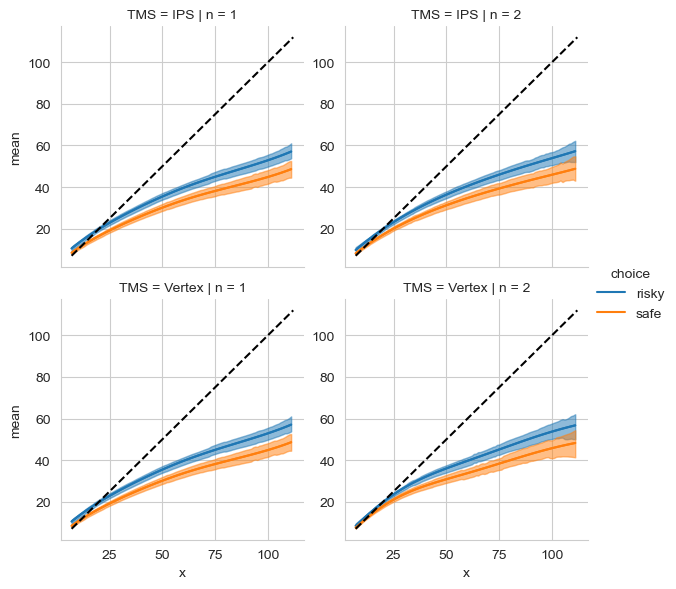

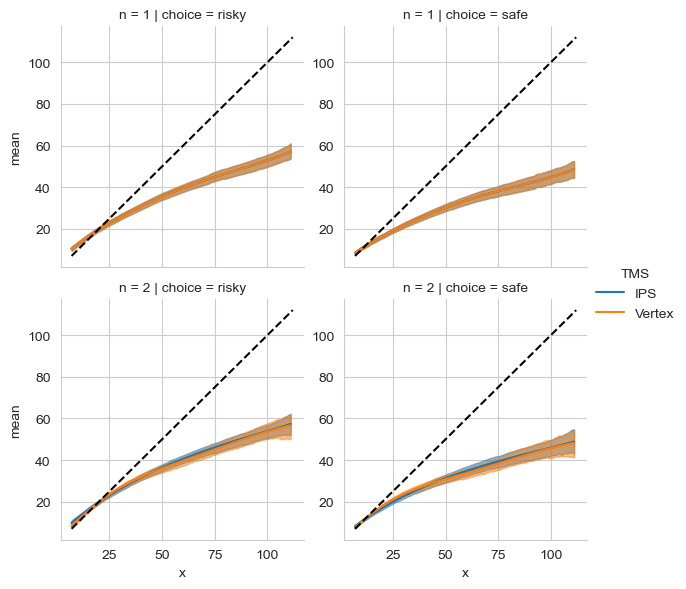

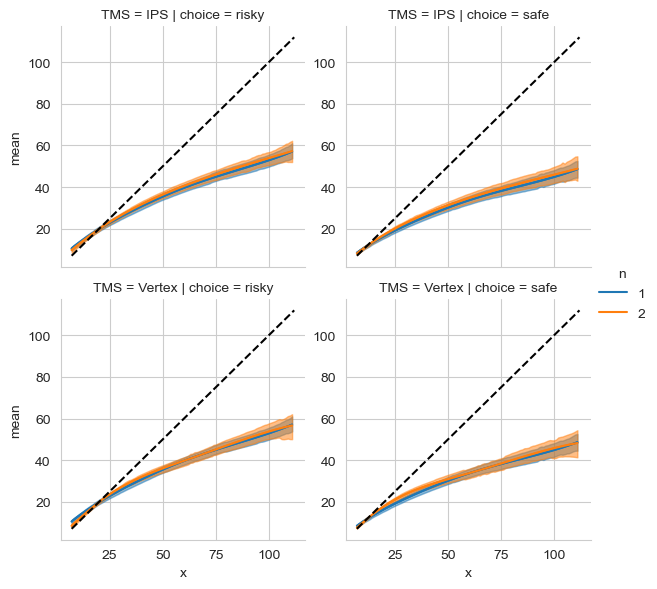

In [121]:
def get_hdi(x):
    return pd.Series(az.hdi(x.values, hdi_prob=0.9), index=['hdi025', 'hdi975'])
mean = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).mean().to_frame('mean')
hdi = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).apply(get_hdi).unstack()

pars = mean.join(hdi)

g = sns.FacetGrid(pars.reset_index(), col='n', sharey=False, hue='choice', row='TMS')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')


g = sns.FacetGrid(pars.reset_index(), col='choice', sharey=False, hue='TMS', row='n')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')

g = sns.FacetGrid(pars.reset_index(), col='choice', sharey=False, hue='n', row='TMS')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')

In [122]:
pars = pars.reset_index()

(-10.0, 10.0)

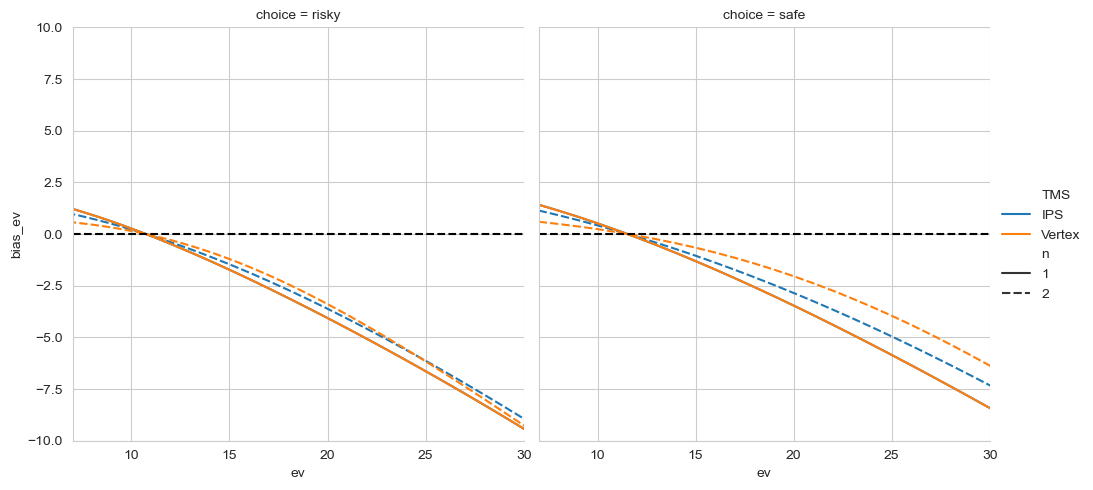

In [123]:
# pars['bias'] = pars['mean'] - pars.index.get_level_values('x')
sns.set_style('whitegrid')


# g = sns.FacetGrid(pars.reset_index(), style='n', sharey=False, hue='choice', row='TMS')
# # g.map_dataframe(plot_prediction, x='x', y='bias')
# g.map(sns.lineplot, 'x', 'bias')
# g.add_legend()


pars['ev'] = pars['x'].where(pars['choice'] == 'safe', pars['x'] * .55)
pars['ev_hat'] = pars['mean'].where(pars['choice'] == 'safe', pars['mean'] * .55)

pars['bias_ev'] = pars['ev_hat'] - pars['ev']


g = sns.relplot(x='ev', y='bias_ev', style='n', hue='TMS', col='choice', data=pars.reset_index(), kind='line')

for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--')

plt.xlim(7, 30)
plt.ylim(-10, 10)


(-10.0, 10.0)

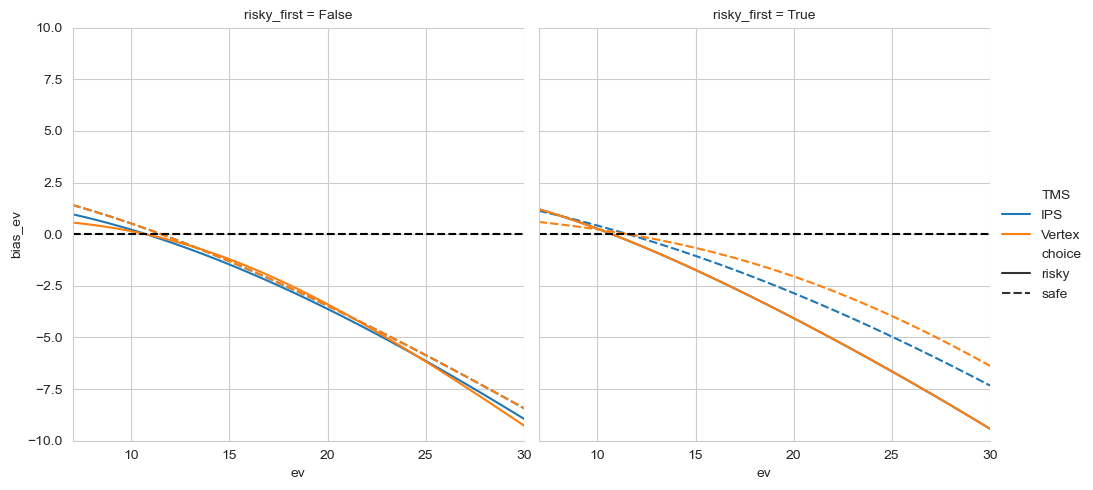

In [125]:
pars['risky_first'] = ((pars['choice'] == 'risky') & (pars['n'] == 1)) | ((pars['choice'] == 'safe') & (pars['n'] == 2))
g = sns.relplot(x='ev', y='bias_ev', style='choice', hue='TMS', col='risky_first', data=pars.reset_index(), kind='line')

for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--')

plt.xlim(7, 30)
plt.ylim(-10, 10)

In [75]:
pars

mean     hdi025     hdi975       bias
n x   TMS    choice                                            
1 7   IPS    risky   16.027320  14.030898  18.426368   9.027320
             safe    10.123618   8.662012  11.788551   3.123618
      Vertex risky   16.027320  14.030898  18.426368   9.027320
             safe    10.123618   8.662012  11.788551   3.123618
  8   IPS    risky   16.209357  14.158815  18.465137   8.209357
...                        ...        ...        ...        ...
2 110 Vertex safe    73.507185  67.125092  78.849357 -36.492815
  111 IPS    risky   73.298812  68.130343  77.714977 -37.701188
             safe    73.753387  68.457757  79.399252 -37.246613
      Vertex risky   73.823005  67.090152  78.930062 -37.176995
             safe    74.300920  67.252297  79.689179 -36.699080

[840 rows x 4 columns]

# Flexible 1C

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found n1_evidence_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')


array([[<Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>,
        <Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>]],
      dtype=object)

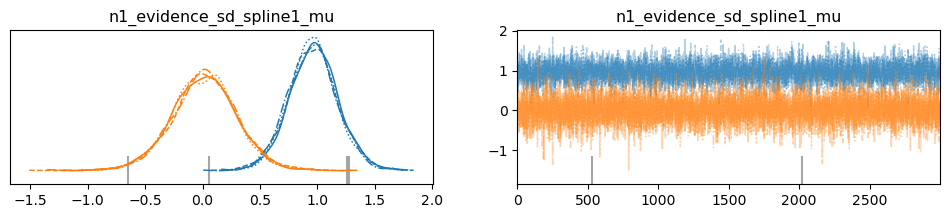

In [32]:
df, model, idata = get_info('flexible1c')

az.plot_trace(idata, var_names=['n1_evidence_sd_spline1_mu'])
# idata = idata.sel(chain=[0, 1, 3])

In [33]:
n1_evidence_sd_ips = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n1_evidence_sd_vertex = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

n2_evidence_sd_ips = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n2_evidence_sd_vertex = n2_evidence_sd_ips

for d in (n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex):
    d.columns = range(1, 6)

evidence_sd = pd.concat((n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex),axis=0,
                        keys=[(1, 'IPS'), (1, 'Vertex'), (2, 'IPS'), (2, 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(model, evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(lambda x: get_curve_stats(model, x))

array([[<Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>,
        <Axes: title={'center': 'n1_evidence_sd_spline1_mu'}>]],
      dtype=object)

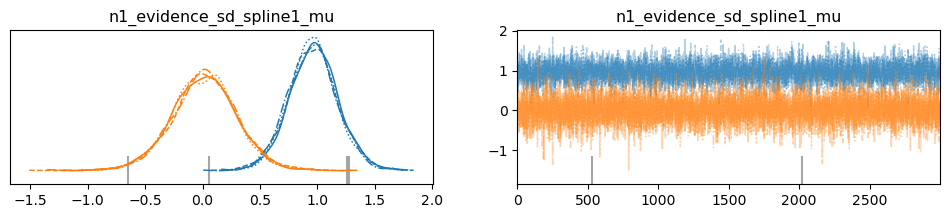

In [ ]:
az.plot_trace(idata, var_names=['n1_evidence_sd_spline1_mu'])

In [ ]:
n1_evidence_sd_ips = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n1_evidence_sd_vertex = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

n2_evidence_sd_ips = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n2_evidence_sd_vertex = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)

x = np.arange(7, 112)
dm = model.make_dm(x)

def get_curve_posterior(evidence_sd_posterior):
    curve_posterior = evidence_sd_posterior.dot(dm.T)
    curve_posterior.columns = x
    curve_posterior.columns.name = 'x'

    return softplus_np(curve_posterior)

def get_curve_stats(evidence_sd_posterior):
    curve_posterior = get_curve_posterior(evidence_sd_posterior)

    return model.get_sd_curve_stats(curve_posterior.stack().to_frame('sd'))

for d in [n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex]:
    d.columns = range(5)

evidence_sd = pd.concat((n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex),axis=0,
                        keys=[(1, 'IPS'), (1, 'Vertex'), (2, 'IPS'), (2, 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(get_curve_stats)

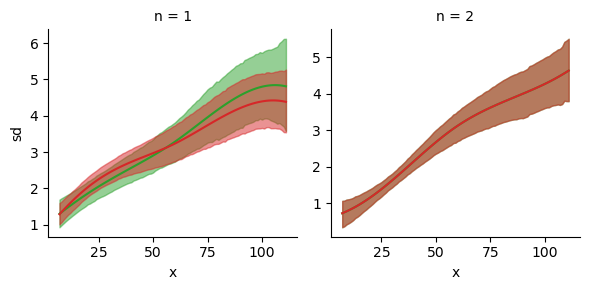

In [ ]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=[1, 2], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')

(7.0, 60.0)

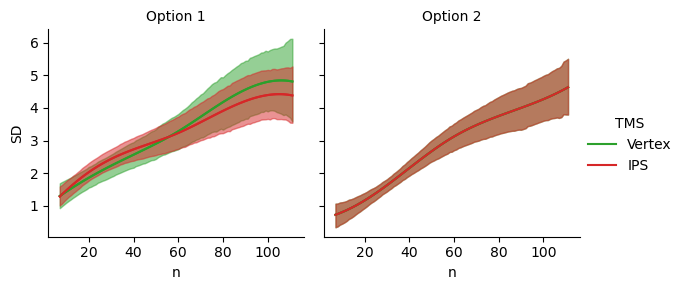

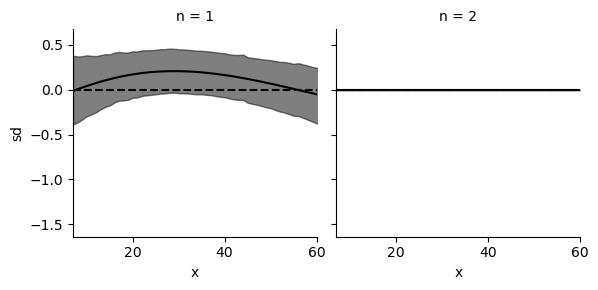

In [34]:
g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_wrap=2, hue_order=stimulation_order)
g.map_dataframe(plot_prediction, x='x', y='sd')
g.map(plt.plot, 'x', 'sd')

g.set_titles('Option {col_name}')
g.set(ylabel='SD', xlabel='n')
g.add_legend()

g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd.pdf'))

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)
# g.savefig(op.join(bids_folder, 'derivatives', 'figures', f'model-flexible1_evidence_sd_diff.pdf'))

# Flexible 1 null

In [6]:
idata.posterior

<xarray.Dataset>
Dimensions:                            (chain: 4, draw: 3000,
                                        n1_evidence_sd_spline1_regressors: 1,
                                        subject: 35,
                                        n1_evidence_sd_spline2_regressors: 1,
                                        n1_evidence_sd_spline3_regressors: 1,
                                        n1_evidence_sd_spline4_regressors: 1,
                                        ...
                                        n2_evidence_sd_spline4_regressors: 1,
                                        n2_evidence_sd_spline5_regressors: 1,
                                        risky_prior_mu_regressors: 1,
                                        risky_prior_sd_regressors: 1,
                                        safe_prior_mu_regressors: 1,
                                        safe_prior_sd_regressors: 1)
Coordinates: (12/17)
  * chain                              (chain) int64 0 1 2 3
  * draw                               (draw) int64 0 1 2 3 ... 2997 2998 2999
  * n1_evidence_sd_spline1_regressors  (n1_evidence_sd_spline1_regressors) <U9 ...
  * subject                            (subject) int64 1 2 3 4 5 ... 67 69 72 74
  * n1_evidence_sd_spline2_regressors  (n1_evidence_sd_spline2_regressors) <U9 ...
  * n1_evidence_sd_spline3_regressors  (n1_evidence_sd_spline3_regressors) <U9 ...
    ...                                 ...
  * n2_evidence_sd_spline4_regressors  (n2_evidence_sd_spline4_regressors) <U9 ...
  * n2_evidence_sd_spline5_regressors  (n2_evidence_sd_spline5_regressors) <U9 ...
  * risky_prior_mu_regressors          (risky_prior_mu_regressors) <U9 'Inter...
  * risky_prior_sd_regressors          (risky_prior_sd_regressors) <U9 'Inter...
  * safe_prior_mu_regressors           (safe_prior_mu_regressors) <U9 'Interc...
  * safe_prior_sd_regressors           (safe_prior_sd_regressors) <U9 'Interc...
Data variables: (12/56)
    n1_evidence_sd_spline1_mu          (chain, draw, n1_evidence_sd_spline1_regressors) float64 ...
    n1_evidence_sd_spline1_offset      (chain, draw, subject, n1_evidence_sd_spline1_regressors) float64 ...
    n1_evidence_sd_spline2_mu          (chain, draw, n1_evidence_sd_spline2_regressors) float64 ...
    n1_evidence_sd_spline2_offset      (chain, draw, subject, n1_evidence_sd_spline2_regressors) float64 ...
    n1_evidence_sd_spline3_mu          (chain, draw, n1_evidence_sd_spline3_regressors) float64 ...
    n1_evidence_sd_spline3_offset      (chain, draw, subject, n1_evidence_sd_spline3_regressors) float64 ...
    ...                                 ...
    n2_evidence_sd_spline4             (chain, draw, subject, n2_evidence_sd_spline4_regressors) float64 ...
    n2_evidence_sd_spline5             (chain, draw, subject, n2_evidence_sd_spline5_regressors) float64 ...
    risky_prior_mu                     (chain, draw, subject, risky_prior_mu_regressors) float64 ...
    risky_prior_sd                     (chain, draw, subject, risky_prior_sd_regressors) float64 ...
    safe_prior_mu                      (chain, draw, subject, safe_prior_mu_regressors) float64 ...
    safe_prior_sd                      (chain, draw, subject, safe_prior_sd_regressors) float64 ...
Attributes:
    created_at:                 2024-06-10T15:09:29.735147
    arviz_version:              0.17.0
    inference_library:          pymc
    inference_library_version:  5.10.3
    sampling_time:              6348.683629989624
    tuning_steps:               3000

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 

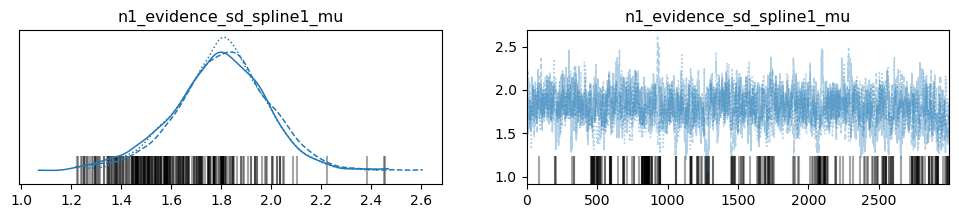

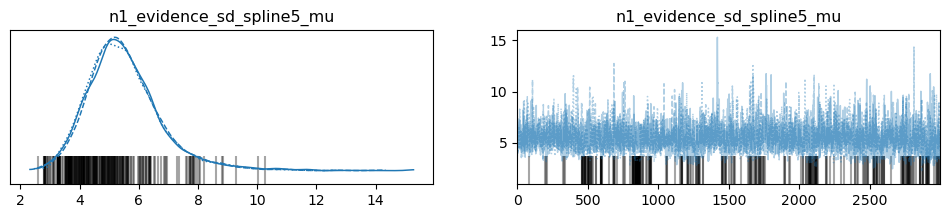

In [10]:
df, model, idata = get_info('flexible1_null')

az.plot_trace(idata.sel(chain=[1,2,3]), var_names=['n1_evidence_sd_spline1_mu'])
az.plot_trace(idata.sel(chain=[1,2,3]), var_names=['n1_evidence_sd_spline5_mu'])

idata = idata.sel(chain=[1,2,3])

In [12]:
n1_evidence_sd_ips = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n1_evidence_sd_vertex = pd.concat([idata.posterior[f'n1_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)

n2_evidence_sd_ips = pd.concat([idata.posterior[f'n2_evidence_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
n2_evidence_sd_vertex = n2_evidence_sd_ips

for d in (n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex):
    d.columns = range(1, 6)

evidence_sd = pd.concat((n1_evidence_sd_ips, n1_evidence_sd_vertex, n2_evidence_sd_ips, n2_evidence_sd_vertex),axis=0,
                        keys=[(1, 'IPS'), (1, 'Vertex'), (2, 'IPS'), (2, 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(model, evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(lambda x: get_curve_stats(model, x))

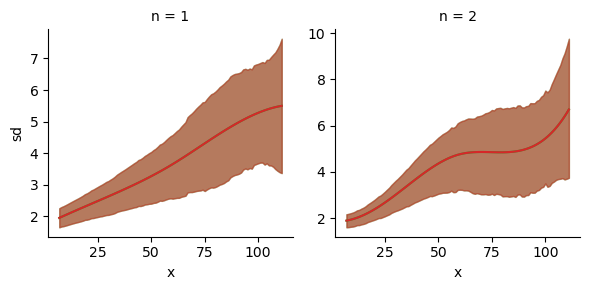

In [13]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=[1, 2], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')

In [18]:
model.build_estimation_model(df)
ppc = model.ppc(df, idata)

{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'risky_prior_mu': {

Sampling: [ll_bernoulli]


In [22]:
ix_risky_first = ppc.index.get_level_values('risky_first')
ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

In [23]:
from tms_risk.cogmodels.utils import plot_ppc

                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


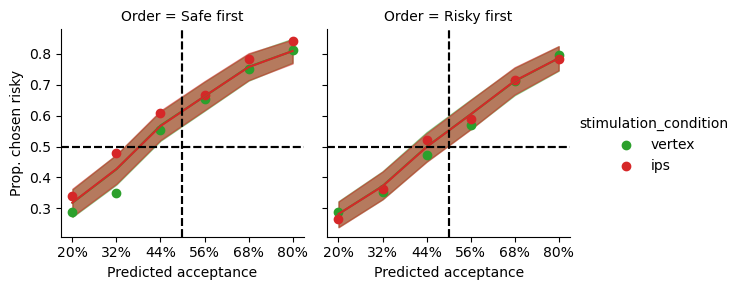

In [24]:

plot_ppc(df, ppc, plot_type=7, level='group')

                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


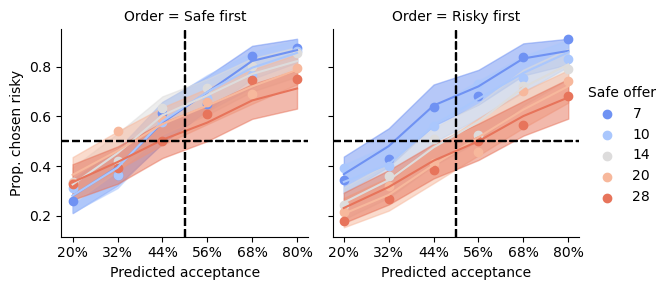

In [25]:

plot_ppc(df, ppc, plot_type=5, level='group')

                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


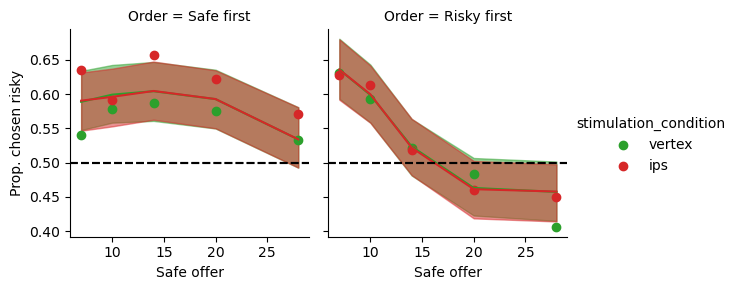

In [26]:

plot_ppc(df, ppc, plot_type=6, level='group')

# Flexible 2

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'memory_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found memory_noise_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found perceptual_noise_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')


array([[<Axes: title={'center': 'memory_noise_sd_spline1_mu'}>,
        <Axes: title={'center': 'memory_noise_sd_spline1_mu'}>]],
      dtype=object)

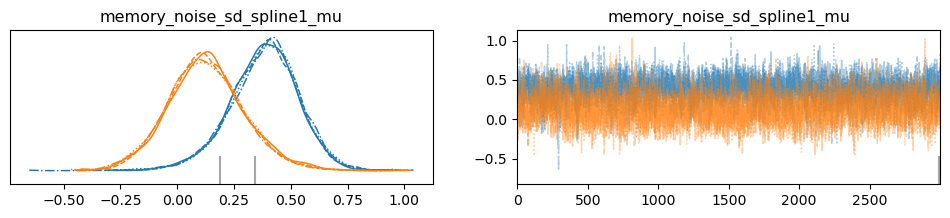

In [27]:
df, model, idata = get_info('flexible2')

az.plot_trace(idata, var_names=['memory_noise_sd_spline1_mu'])

In [28]:
memory_noise_sd_ips = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
memory_noise_sd_vertex = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values


perceptual_noise_sd_ips = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
perceptual_noise_sd_vertex = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

x = np.arange(7, 112)
dm = model.make_dm(x)

def get_curve_posterior(evidence_sd_posterior):
    curve_posterior = evidence_sd_posterior.dot(dm.T)
    curve_posterior.columns = x
    curve_posterior.columns.name = 'x'

    return softplus_np(curve_posterior)

def get_curve_stats(evidence_sd_posterior):
    curve_posterior = get_curve_posterior(evidence_sd_posterior)

    return model.get_sd_curve_stats(curve_posterior.stack().to_frame('sd'))

for d in [memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex]:
    d.columns = range(5)

evidence_sd = pd.concat((memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex),axis=0,
                        keys=[('memory', 'IPS'), ('memory', 'Vertex'), ('perceptual', 'IPS'), ('perceptual', 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(get_curve_stats)

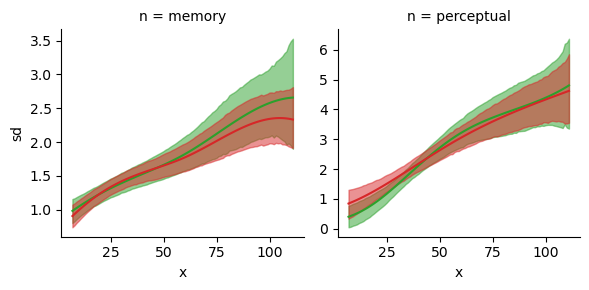

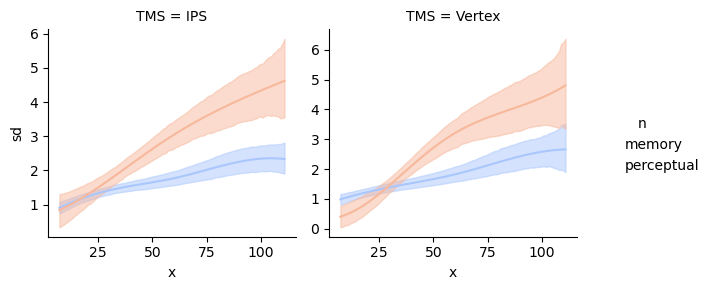

In [29]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=['memory', 'perceptual'], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
# g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

g = sns.FacetGrid(curve_stats.reset_index(), col='TMS', hue='n', palette=sns.color_palette('coolwarm', 2), sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
g.add_legend()

(7.0, 60.0)

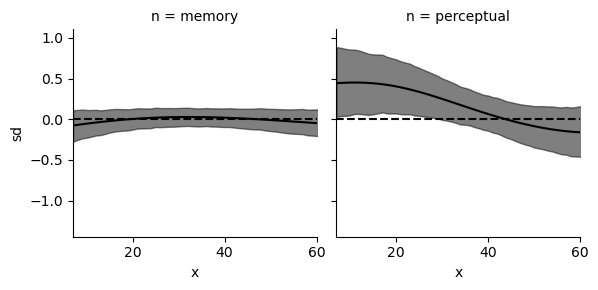

In [30]:
import matplotlib.pyplot as plt

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)

In [31]:
model.build_estimation_model(df)
ppc = model.ppc(df, idata)
ix_risky_first = ppc.index.get_level_values('risky_first')
ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

{'memory_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'i

Sampling: [ll_bernoulli]


                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


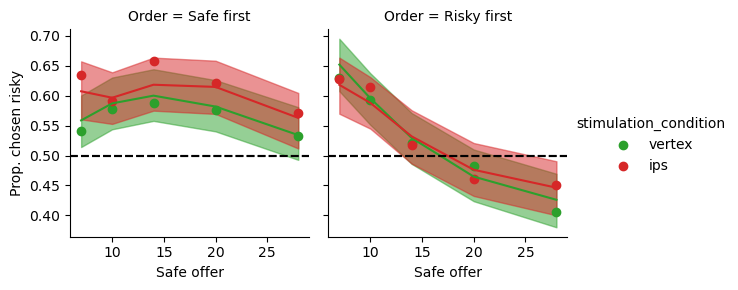

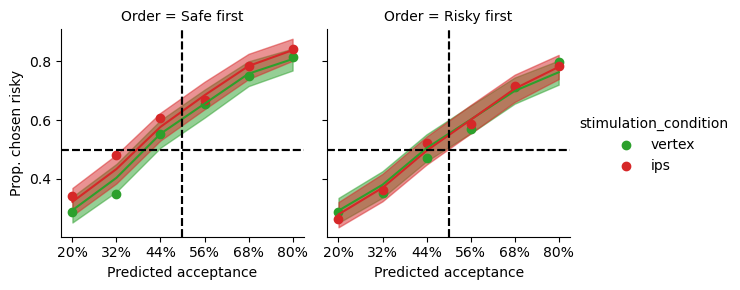

In [35]:
plot_ppc(df, ppc, plot_type=6, level='group')
plot_ppc(df, ppc, plot_type=7, level='group')

# Analyze flexible 2C

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'memory_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found perceptual_noise_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')


array([[<Axes: title={'center': 'perceptual_noise_sd_spline1_mu'}>,
        <Axes: title={'center': 'perceptual_noise_sd_spline1_mu'}>]],
      dtype=object)

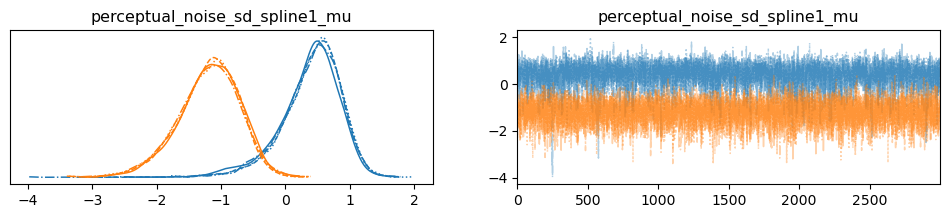

In [3]:
model_label = 'flexible2b'

df, model, idata = get_info(model_label)

az.plot_trace(idata, var_names=['perceptual_noise_sd_spline1_mu'])
# idata = idata.sel(chain=[0, 1, 3])

In [4]:
memory_noise_sd_ips = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
memory_noise_sd_vertex = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)


perceptual_noise_sd_ips = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
perceptual_noise_sd_vertex = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

x = np.arange(7, 112)
dm = model.make_dm(x)

def get_curve_posterior(evidence_sd_posterior):
    curve_posterior = evidence_sd_posterior.dot(dm.T)
    curve_posterior.columns = x
    curve_posterior.columns.name = 'x'

    return softplus_np(curve_posterior)

def get_curve_stats(evidence_sd_posterior):
    curve_posterior = get_curve_posterior(evidence_sd_posterior)

    return model.get_sd_curve_stats(curve_posterior.stack().to_frame('sd'))

for d in [memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex]:
    d.columns = range(5)

evidence_sd = pd.concat((memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex),axis=0,
                        keys=[('memory', 'IPS'), ('memory', 'Vertex'), ('perceptual', 'IPS'), ('perceptual', 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(get_curve_stats)

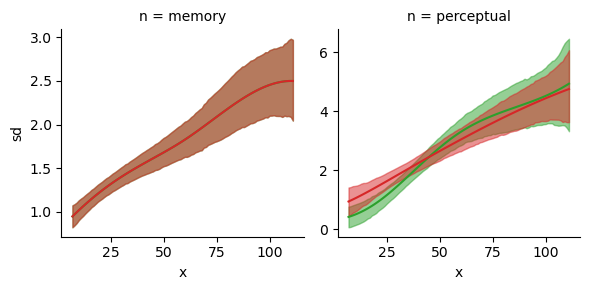

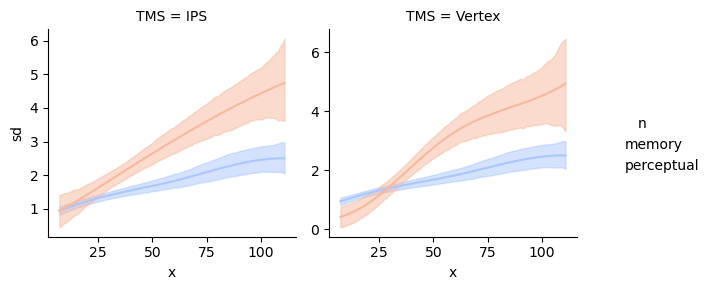

In [5]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=['memory', 'perceptual'], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
# g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

g = sns.FacetGrid(curve_stats.reset_index(), col='TMS', hue='n', palette=sns.color_palette('coolwarm', 2), sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
g.add_legend()

(7.0, 60.0)

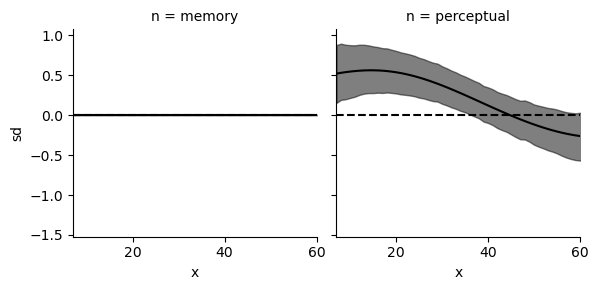

In [6]:
import matplotlib.pyplot as plt

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)

In [7]:
model.build_estimation_model(df)
ppc = model.ppc(df, idata)
ix_risky_first = ppc.index.get_level_values('risky_first')
ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

{'memory_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'i

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_12611/2272491251.py", line 2, in <module>
    ppc = model.ppc(df, idata)
  File "/Users/gdehol/git/bauer/bauer/core.py", line 228, in ppc
    idata = pm.sample_posterior_predictive(idata, var_names=var_names)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pymc/sampling/forward.py", line 614, in sample_posterior_predictive
    _sampler_fn, volatile_basic_rvs = compile_forward_sampling_function(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pymc/sampling/forward.py", line 263, in compile_forward_sampling_function
    compile_pymc(inputs, fg.outputs, givens=givens, on_unused_input="ignore", **kwargs),
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pymc/pytensorf.py", line 

                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


                      session stimulation_condition        rt    n1    n2  \
subject run trial_nr                                                        
1       1   1               2                vertex  1.239692  28.0  86.0   
            2               2                vertex  0.836219   7.0  21.0   
            3               2                vertex  0.931371   7.0  21.0   
            4               2                vertex  1.135164  10.0  24.0   
            5               2                vertex  1.032161  20.0  44.0   
...                       ...                   ...       ...   ...   ...   
74      6   116             3                vertex  1.055890  37.0  20.0   
            117             3                vertex  0.739095  55.0  14.0   
            118             3                vertex  0.371731  22.0  20.0   
            119             3                vertex  0.705755  14.0  10.0   
            120             3                vertex  0.672241  15.0  14.0   

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


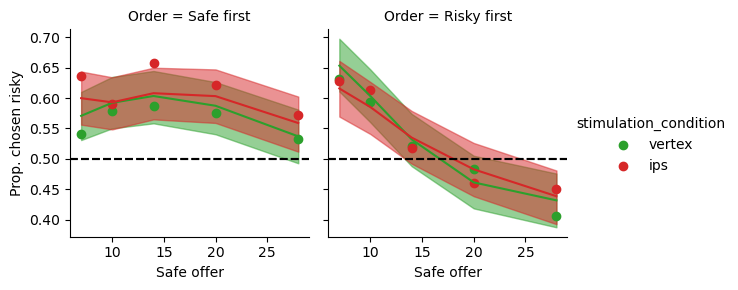

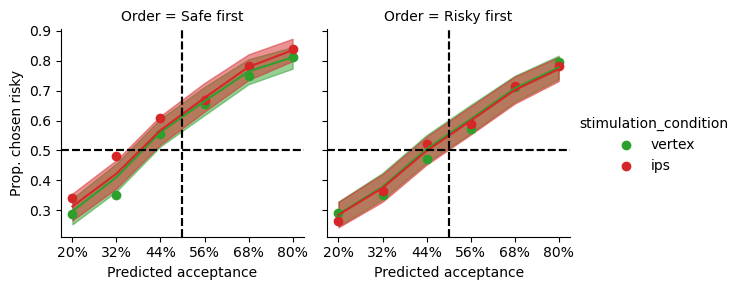

In [ ]:
plot_ppc(df, ppc, plot_type=6, level='group')
plot_ppc(df, ppc, plot_type=7, level='group')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_22523/2342127588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(idata.posterior['risky_prior_mu_mu'].to_dataframe())
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_22523/2342127588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: ylabel='Density'>

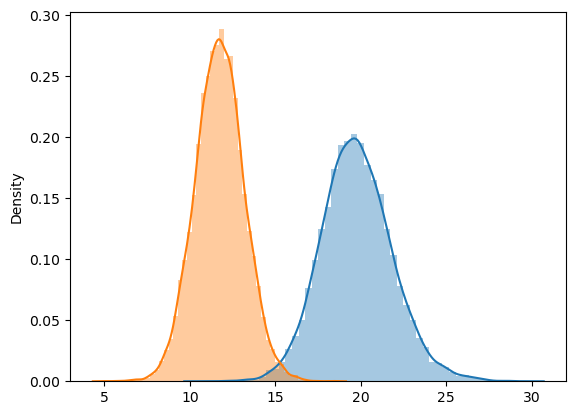

In [ ]:
sns.distplot(idata.posterior['risky_prior_mu_mu'].to_dataframe())
sns.distplot(idata.posterior['safe_prior_mu_mu'].to_dataframe())

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_22523/266659262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(idata.posterior['risky_prior_sd_mu'].to_dataframe())
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_22523/266659262.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: ylabel='Density'>

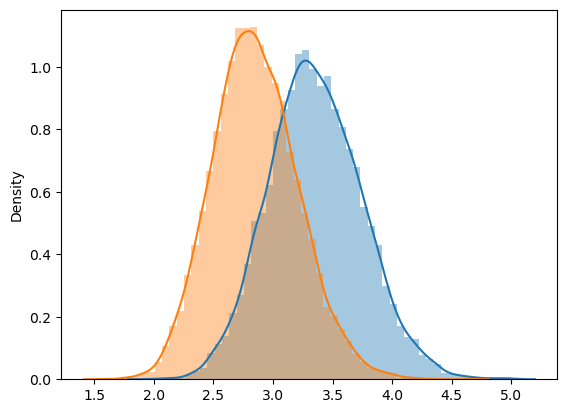

In [ ]:
sns.distplot(idata.posterior['risky_prior_sd_mu'].to_dataframe())
sns.distplot(idata.posterior['safe_prior_sd_mu'].to_dataframe())

In [ ]:
evidence_sd

0         1         2         3         4
n          TMS    chain draw                                                  
memory     IPS    0     0     0.440105  1.171914  1.660547  2.663828  2.498030
                        1     0.576735  1.053313  1.507012  2.501205  2.443677
                        2     0.456170  1.020771  1.836946  2.204778  2.424255
                        3     0.462350  1.273193  1.340861  2.586175  2.560123
                        4     0.474257  0.997219  1.725844  2.252165  2.352617
...                                ...       ...       ...       ...       ...
perceptual Vertex 3     2995 -0.787420  0.714151  3.834670  3.572468  3.710159
                        2996 -1.178687  0.699986  3.790939  4.196636  5.271617
                        2997 -0.540486  1.297667  3.449211  3.830071  3.817815
                        2998 -0.027913 -0.102563  4.773982  3.769337  5.130658
                        2999 -0.241204  0.676122  4.045607  3.570747  5.036871

[48000 rows x 5 columns]

x                             7         8         9         10        11   \
n          TMS    chain                                                     
memory     IPS    0      0.937218  0.962778  0.988082  1.013113  1.037855   
                  0      0.856308  0.887379  0.918179  0.948667  0.978805   
                  0      0.806750  0.833569  0.860079  0.886245  0.912035   
                  0      0.829656  0.849031  0.868411  0.887787  0.907150   
                  0      0.979977  1.005671  1.030825  1.055421  1.079441   
...                           ...       ...       ...       ...       ...   
perceptual Vertex 3      0.708299  0.725887  0.744743  0.764880  0.786313   
                  3      0.430805  0.454370  0.479366  0.505843  0.533846   
                  3      0.405501  0.438417  0.473114  0.509590  0.547835   
                  3      0.736999  0.768613  0.801109  0.834475  0.868693   
                  3      0.230717  0.254357  0.280124  0.308140  0.338519   

x                             12        13        14        15        16   \
n          TMS    chain                                                     
memory     IPS    0      1.062296  1.086422  1.110226  1.133699  1.156835   
                  0      1.008560  1.037902  1.066805  1.095249  1.123215   
                  0      0.937422  0.962380  0.986888  1.010928  1.034483   
                  0      0.926490  0.945801  0.965074  0.984303  1.003480   
                  0      1.102874  1.125709  1.147941  1.169564  1.190578   
...                           ...       ...       ...       ...       ...   
perceptual Vertex 3      0.809053  0.833114  0.858504  0.885232  0.913303   
                  3      0.563416  0.594591  0.627402  0.661877  0.698034   
                  3      0.587828  0.629538  0.672926  0.717945  0.764538   
                  3      0.903743  0.939606  0.976256  1.013668  1.051814   
                  3      0.371368  0.406782  0.444843  0.485618  0.529154   

x                        ...       102       103       104       105  \
n          TMS    chain  ...                                           
memory     IPS    0      ...  2.602461  2.605048  2.606575  2.607012   
                  0      ...  2.855570  2.865065  2.873566  2.881036   
                  0      ...  2.228328  2.236223  2.243624  2.250514   
                  0      ...  2.375461  2.391003  2.406633  2.422355   
                  0      ...  2.236667  2.237926  2.238229  2.237546   
...                      ...       ...       ...       ...       ...   
perceptual Vertex 3      ...  4.332939  4.383683  4.436349  4.491016   
                  3      ...  4.080586  4.081392  4.081551  4.081086   
                  3      ...  4.429638  4.424443  4.417358  4.408358   
                  3      ...  3.756485  3.761632  3.766132  3.769987   
                  3      ...  5.088157  5.128463  5.170184  5.213402   

x                             106       107       108       109       110  \
n          TMS    chain                                                     
memory     IPS    0      2.606329  2.604497  2.601485  2.597265  2.591808   
                  0      2.887443  2.892753  2.896932  2.899949  2.901768   
                  0      2.256874  2.262687  2.267934  2.272598  2.276661   
                  0      2.438174  2.454094  2.470118  2.486251  2.502497   
                  0      2.235845  2.233097  2.229272  2.224341  2.218274   
...                           ...       ...       ...       ...       ...   
perceptual Vertex 3      4.547764  4.606671  4.667816  4.731278  4.797137   
                  3      4.080021  4.078378  4.076180  4.073450  4.070211   
                  3      4.397420  4.384518  4.369630  4.352731  4.333798   
                  3      3.773202  3.775781  3.777727  3.779044  3.779737   
                  3      5.258197  5.304652  5.352847  5.402864  5.454785   

x                             111  
n          TMS    cha

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/multi.py", line 1542, in _get_level_number
    level = self.names.index(level)
ValueError: 'draw' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_12611/2280952756.py", line 1, in <module>
    curve_posterior = curve_posterior.xs(slice(None, None, 10), level='draw', drop_level=False)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/generic.py", line 4209, in xs
    loc, new_ax = labels.get_loc_level(key, level=level, drop_level=drop_level)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/multi.py", line 303

In [75]:
curve_posterior

x                                  7         8         9         10   \
n          TMS    chain draw                                           
memory     IPS    0     0     0.937218  0.962778  0.988082  1.013113   
                        100   0.982398  1.010227  1.037488  1.064157   
                        200   0.921760  0.951177  0.980144  1.008628   
                        300   0.955602  0.971988  0.988333  1.004633   
                        400   0.966737  0.983000  0.999247  1.015475   
...                                ...       ...       ...       ...   
perceptual Vertex 3     2500  0.579089  0.604570  0.631367  0.659508   
                        2600  0.521793  0.537278  0.554244  0.572735   
                        2700  0.733976  0.749311  0.766027  0.784141   
                        2800  0.383386  0.406608  0.431534  0.458237   
                        2900  0.363493  0.397937  0.434696  0.473788   

x                                  11        12        13        14   \
n          TMS    chain draw                                           
memory     IPS    0     0     1.037855  1.062296  1.086422  1.110226   
                        100   1.090212  1.115635  1.140414  1.164538   
                        200   1.036600  1.064035  1.090912  1.117214   
                        300   1.020883  1.037081  1.053224  1.069307   
                        400   1.031683  1.047866  1.064023  1.080152   
...                                ...       ...       ...       ...   
perceptual Vertex 3     2500  0.689019  0.719923  0.752238  0.785979   
                        2600  0.592797  0.614478  0.637829  0.662897   
                        2700  0.803668  0.824625  0.847027  0.870893   
                        2800  0.486789  0.517259  0.549707  0.584186   
                        2900  0.515213  0.558950  0.604962  0.653193   

x                                  15        16   ...       102       103  \
n          TMS    chain draw                      ...                       
memory     IPS    0     0     1.133699  1.156835  ...  2.602461  2.605048   
                        100   1.187999  1.210794  ...  2.348653  2.352672   
                        200   1.142927  1.168040  ...  2.796066  2.820887   
                        300   1.085329  1.101286  ...  2.226311  2.236164   
                        400   1.096251  1.112318  ...  2.436057  2.451181   
...                                ...       ...  ...       ...       ...   
perceptual Vertex 3     2500  0.821156  0.857774  ...  3.920513  3.892119   
                        2600  0.689730  0.718376  ...  5.397088  5.448335   
                        2700  0.896235  0.923067  ...  4.918470  4.959521   
                        2800  0.620743  0.659411  ...  4.340694  4.410416   
                        2900  0.703568  0.755996  ...  4.012096  4.083518   

x                                  104       105       106       107  \
n          TMS    chain draw                                           
memory     IPS    0     0     2.606575  2.607012  2.606329  2.604497   
                        100   2.355813  2.358046  2.359341  2.359669   
                        200   2.845669  2.870399  2.895066  2.919655   
                        300   2.245896  2.255507  2.264994  2.274355   
                        400   2.466272  2.481331  2.496354  2.511342   
...                                ...       ...       ...       ...   
perceptual Vertex 3     2500  3.861246  3.827868  3.791964  3.753512   
                        2600  5.500562  5.553828  5.608192  5.663711   
                        2700  5.001047  5.043086  5.085674  5.128847   
                        2800  4.484623  4.563488  4.647186  4.735889   
                        2900  4.159680  4.240752  4.326906  4.418310   

x                                  108       109       110       111  
n          TMS    chain draw                                          
memory     IPS    0     0     2.601485  2.597

In [30]:
curve_posterior = curve_posterior.xs(slice(None, None, 25), level='draw', drop_level=False)

tmp = curve_posterior.stack().unstack('n')
tmp_n1 = tmp['memory'] + tmp['perceptual']
tmp_n2 = tmp['perceptual']

evidence_sd = pd.concat((tmp_n1, tmp_n2), axis=0, keys=[1, 2], names=['n'])


evidence_mu = tmp.index.get_level_values('x').to_series()
evidence_mu.index = tmp.index

risky_prior_mu = idata.posterior['risky_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
risky_prior_sd = idata.posterior['risky_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_risky = (evidence_sd + risky_prior_sd)
risky_posterior_mu = evidence_mu * (evidence_sd /denom_risky) + risky_prior_mu * (risky_prior_sd / denom_risky)
risky_posterior_mu.name = 'posterior_mu'

safe_prior_mu = idata.posterior['safe_prior_mu_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]
safe_prior_sd = idata.posterior['safe_prior_sd_mu'].to_dataframe().xs(slice(None, None, 25), level='draw', drop_level=False).droplevel(-1).iloc[:, 0]

denom_safe = (evidence_sd + safe_prior_sd)
safe_posterior_mu = evidence_mu * (evidence_sd /denom_safe) + safe_prior_mu * (safe_prior_sd / denom_safe)
safe_posterior_mu.name = 'posterior_mu'

posterior_mu = pd.concat((risky_posterior_mu, safe_posterior_mu), axis=0, keys=['risky', 'safe'], names=['choice'])


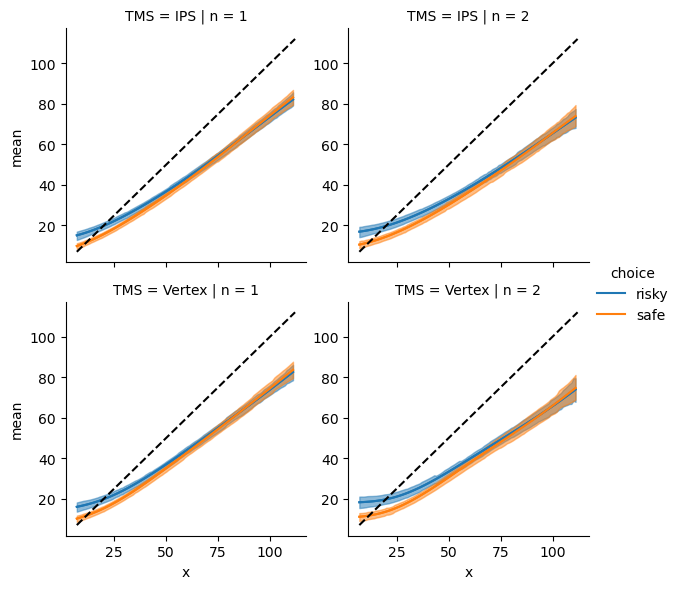

In [33]:
def get_hdi(x):
    return pd.Series(az.hdi(x.values, hdi_prob=0.9), index=['hdi025', 'hdi975'])
mean = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).mean().to_frame('mean')
hdi = posterior_mu.groupby(['n', 'x', 'TMS', 'choice']).apply(get_hdi).unstack()

pars = mean.join(hdi)
g = sns.FacetGrid(pars.reset_index(), col='n', sharey=False, hue='choice', row='TMS')
g.map_dataframe(plot_prediction, x='x', y='mean')
g.map(plt.plot, 'x', 'mean')

g.add_legend()

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--')

In [26]:
pars = pars.reset_index()

pars['ev'] = pars['x'].where(pars['choice'] == 'safe', pars['x']*.55)
pars['ev_hat'] = pars['mean'].where(pars['choice'] == 'safe', pars['mean']*.55)

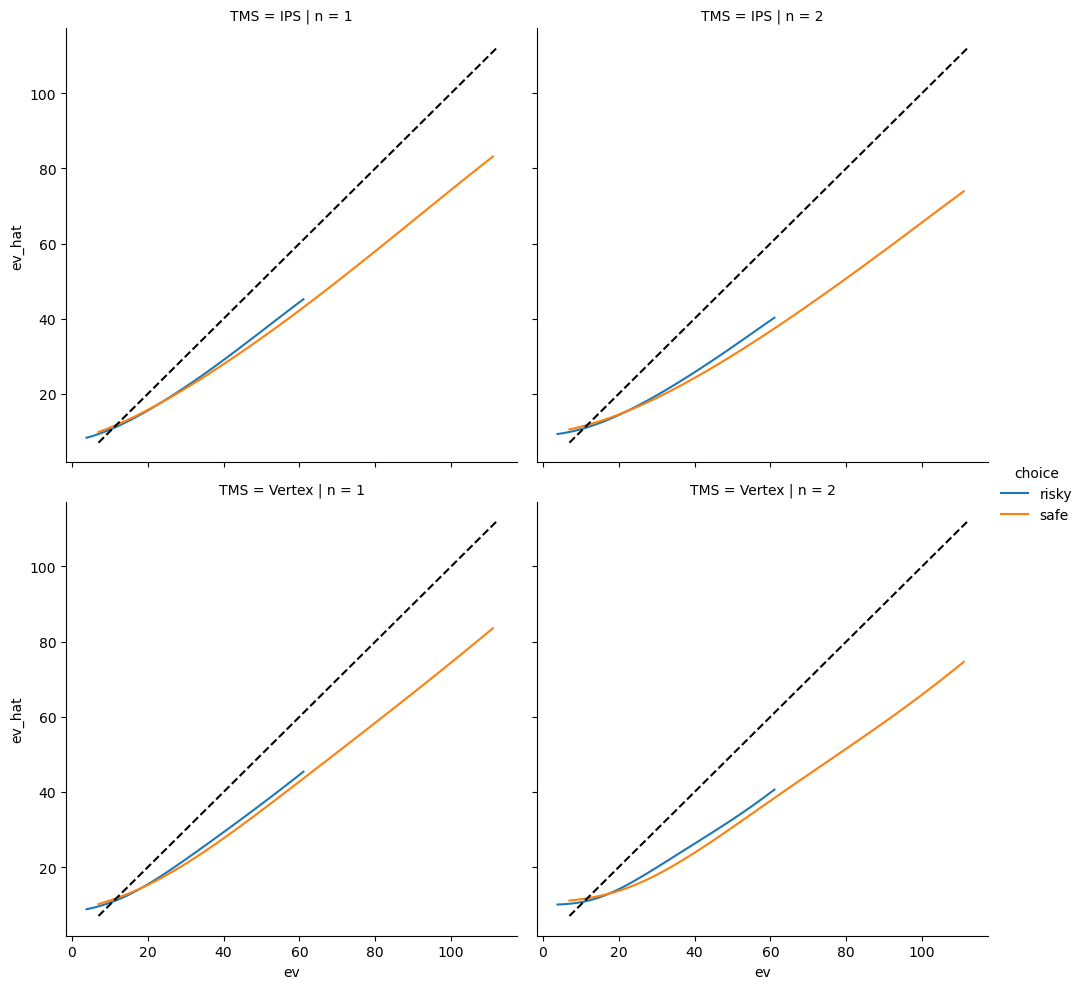

In [28]:
g = sns.relplot(x='ev', y='ev_hat', data=pars, col='n', row='TMS', hue='choice', kind='line')

for ax in g.axes.flat:
    ax.plot([7, 112], [7, 112], color='k', linestyle='--',)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'x'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_2605/3128615447.py", line 1, in <module>
    pars['ev'] = pars['x'].where(

In [58]:
risky_evidence_sd

n  TMS     chain  draw  x  
1  IPS     0      0     7      2.281337
                        8      2.304441
                        9      2.329678
                        10     2.356965
                        11     2.386229
                                 ...   
2  Vertex  3      2999  107    4.674594
                        108    4.741676
                        109    4.811981
                        110    4.885621
                        111    4.962706
Length: 5040000, dtype: float64

In [57]:
risky_prior_sd

chain  draw
0      0       3.399692
       10      3.904105
       20      2.816784
       30      2.961808
       40      3.308333
                 ...   
3      2950    3.003974
       2960    2.941102
       2970    3.385177
       2980    2.612091
       2990    3.136711
Name: risky_prior_sd_mu, Length: 1200, dtype: float64

In [56]:
risky_evidence_sd

n  TMS     chain  draw  x  
1  IPS     0      0     7      2.281337
                        8      2.304441
                        9      2.329678
                        10     2.356965
                        11     2.386229
                                 ...   
2  Vertex  3      2999  107    4.674594
                        108    4.741676
                        109    4.811981
                        110    4.885621
                        111    4.962706
Length: 5040000, dtype: float64

In [55]:
denom

chain  draw  n  TMS     x  
0      0     1  IPS     7      5.681029
                        8      5.704134
                        9      5.729370
                        10     5.756657
                        11     5.785921
                                 ...   
3      2999  2  Vertex  107         NaN
                        108         NaN
                        109         NaN
                        110         NaN
                        111         NaN
Length: 5040000, dtype: float64

In [ ]:
idata.posterior['risky_prior_sd_mu'].to_dataframe().xs(slice(None, None, 10), level='draw')tmp.index.get_level_values('x').to_frame()

,x
x,
7,7
8,8
9,9
10,10
11,11
...,...
107,107
108,108
109,109


In [51]:
risky_prior_sd

chain
0    3.399692
0    3.904105
0    2.816784
0    2.961808
0    3.308333
       ...   
3    3.003974
3    2.941102
3    3.385177
3    2.612091
3    3.136711
Name: risky_prior_sd_mu, Length: 1200, dtype: float64

In [50]:
risky_evidence_sd

n  TMS     chain  draw  x  
1  IPS     0      0     7      2.281337
                        8      2.304441
                        9      2.329678
                        10     2.356965
                        11     2.386229
                                 ...   
2  Vertex  3      2999  107    4.674594
                        108    4.741676
                        109    4.811981
                        110    4.885621
                        111    4.962706
Length: 5040000, dtype: float64

In [45]:
risky_evidence_sd

n  TMS     chain  draw  x  
1  IPS     0      0     7      2.281337
                        8      2.304441
                        9      2.329678
                        10     2.356965
                        11     2.386229
                                 ...   
2  Vertex  3      2999  107    4.674594
                        108    4.741676
                        109    4.811981
                        110    4.885621
                        111    4.962706
Length: 5040000, dtype: float64

In [46]:
risky_prior_sd

chain  draw
0      0       3.399692
       1       3.350008
       2       3.245024
       3       3.526944
       4       3.281796
                 ...   
3      2995    3.128680
       2996    3.111946
       2997    3.257458
       2998    3.293477
       2999    3.541606
Name: risky_prior_sd_mu, Length: 12000, dtype: float64

In [43]:
risky_evidence_mu * (risky_evidence_sd / (risky_evidence_sd + risky_prior_sd))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_12611/2479916648.py", line 1, in <module>
    risky_evidence_mu * (risky_evidence_sd / (risky_evidence_sd + risky_prior_sd))
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/ops/common.py", line 76, in new_method
    return method(self, other)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py", line 202, in __mul__
    return self._arith_method(other, operator.mul)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/series.py", line 5818, in _arith_method
    self, other = self._align_for_op(other)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/series.py", line 5848, in _align_for_op
    left, right = left

In [31]:
risky_prior_mu

chain  draw
0      0       21.588981
       1       23.020064
       2       22.544685
       3       20.117977
       4       23.282279
                 ...    
3      2995    17.237197
       2996    17.483490
       2997    19.460570
       2998    21.314787
       2999    18.740520
Name: risky_prior_mu_mu, Length: 12000, dtype: float64

In [21]:
risky_evidence_sd + risky_prior_mu['risky_prior_mu_mu']

chain  draw  n  TMS     x  
0      0     1  IPS     7      23.870318
                        8      23.893422
                        9      23.918659
                        10     23.945946
                        11     23.975210
                                 ...    
3      2999  2  Vertex  107    23.415115
                        108    23.482196
                        109    23.552502
                        110    23.626141
                        111    23.703226
Length: 5040000, dtype: float64

In [16]:
risky_evidence_sd

n  TMS     chain  draw  x  
1  IPS     0      0     7      2.281337
                        8      2.304441
                        9      2.329678
                        10     2.356965
                        11     2.386229
                                 ...   
2  Vertex  3      2999  107    4.674594
                        108    4.741676
                        109    4.811981
                        110    4.885621
                        111    4.962706
Length: 5040000, dtype: float64

In [55]:
tmp_n1

TMS     chain  draw  x  
IPS     0      0     7      2.281337
                     8      2.304441
                     9      2.329678
                     10     2.356965
                     11     2.386229
                              ...   
Vertex  3      2999  107    7.255146
                     108    7.317160
                     109    7.380641
                     110    7.445653
                     111    7.512260
Length: 2520000, dtype: float64